In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from linearmodels.panel import PanelOLS
import matplotlib.ticker as ticker


#### 1. Time Series of trip volume

##### 1.1 Load data


In [3]:
pooled = pd.read_csv("Data/Pooled_data/PU/data_grouped_all_PU.csv")
medaillon = pd.read_csv("Data/Pooled_data/PU/data_grouped_YG_PU.csv")
# exclude where 2014 is in date_pickup column from medallion
medaillon= medaillon[~medaillon.date_pickup.str.contains("2014")]
fhv = pd.read_csv("Data/Pooled_data/PU/data_grouped_FHV_PU.csv")

In [53]:
taxi_zones = pd.read_csv("Data/Shapefiles/taxi+_zone_lookup.csv")
medaillon = pd.merge(medaillon,taxi_zones[["LocationID", "Borough"]], left_on= f"PULocationID" , right_on= "LocationID" , how = "left")
fhv = pd.merge(fhv,taxi_zones[["LocationID", "Borough"]], left_on= f"PULocationID" , right_on= "LocationID" , how = "left")

##### 1.2 Group by day

In [4]:
pooled_date = pooled.groupby('date_pickup', as_index= False).agg({"trip_number" : "sum"})
pooled_date['date_pickup'] = pd.to_datetime(pooled_date['date_pickup'])
medaillon_date = medaillon.groupby('date_pickup', as_index= False).agg({"trip_number" : "sum"})
medaillon_date['date_pickup'] = pd.to_datetime(medaillon_date['date_pickup'])
fhv_date = fhv.groupby('date_pickup', as_index= False).agg({"trip_number" : "sum"})
fhv_date['date_pickup'] = pd.to_datetime(fhv_date['date_pickup'])

##### Plot

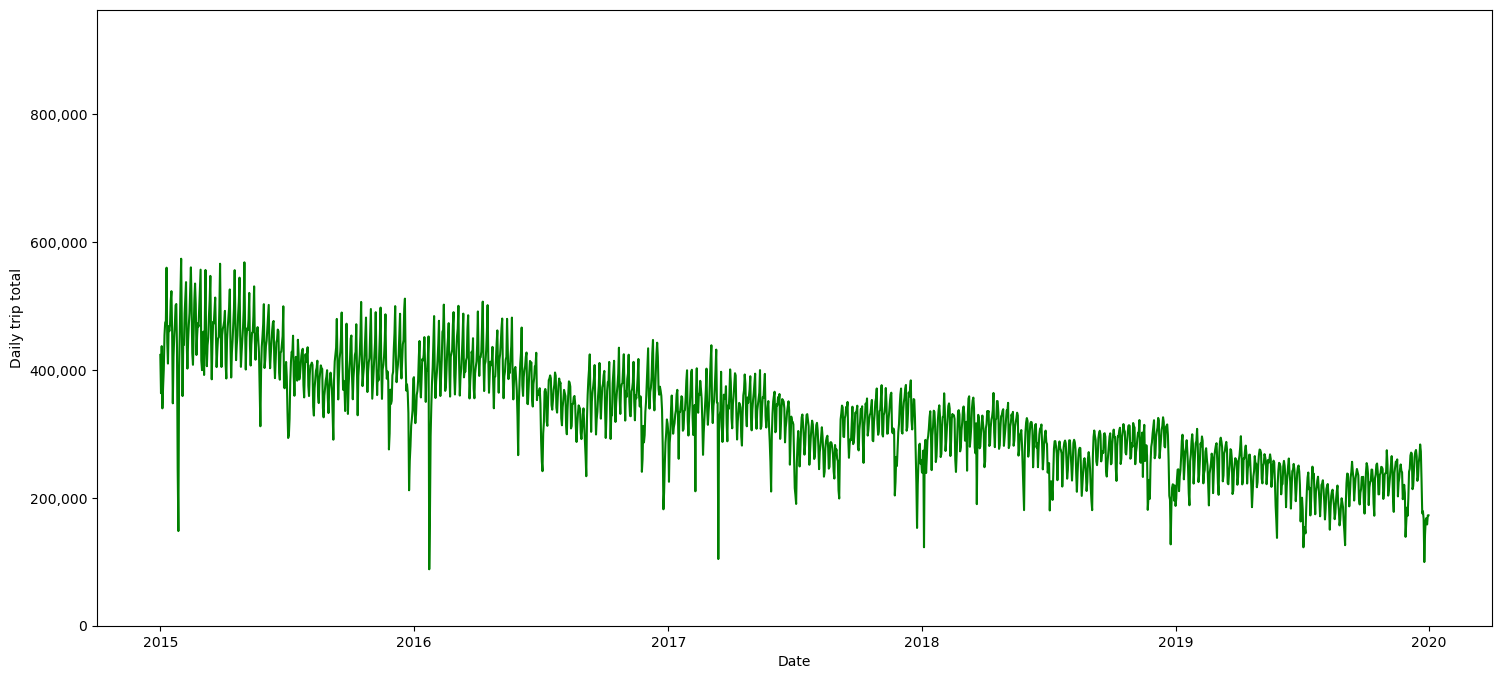

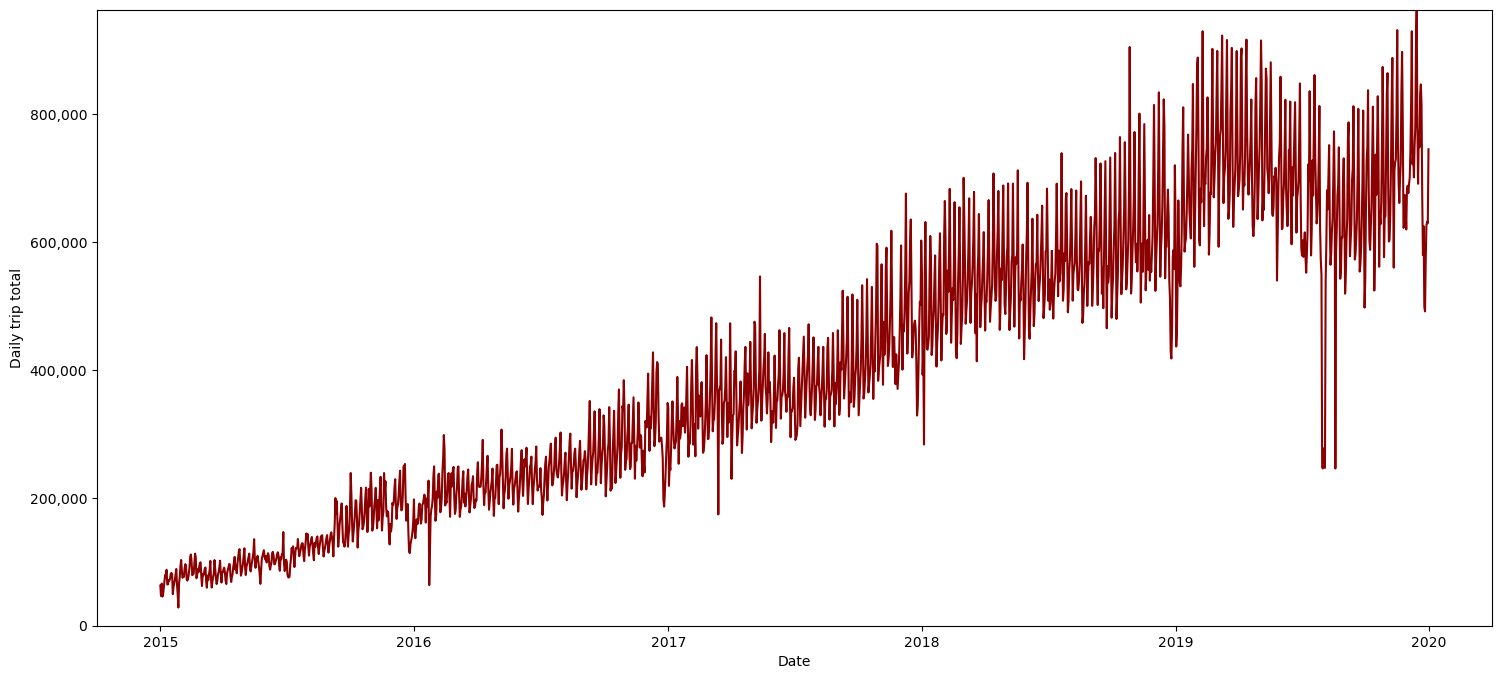

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
global_y_max = max(medaillon_date['trip_number'].max(), fhv_date['trip_number'].max())

# Plot for Medallion data
plt.figure(figsize=(18, 8))  # Set the figure size for the first plot
plt.plot(medaillon_date["date_pickup"], medaillon_date['trip_number'], color='green', label='Daily trip sum')
plt.xlabel('Date')
plt.ylabel('Daily trip total')
plt.ylim(0, global_y_max)  
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_formatter))  # Apply the formatter
plt.show()  
# Plot for FHV data
plt.figure(figsize=(18, 8)) 
plt.plot(fhv_date["date_pickup"], fhv_date['trip_number'], color='darkred', label='Daily trip sum')
plt.xlabel('Date')
plt.ylabel('Daily trip total')
plt.ylim(0, global_y_max)  
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_formatter)) 
plt.show() 

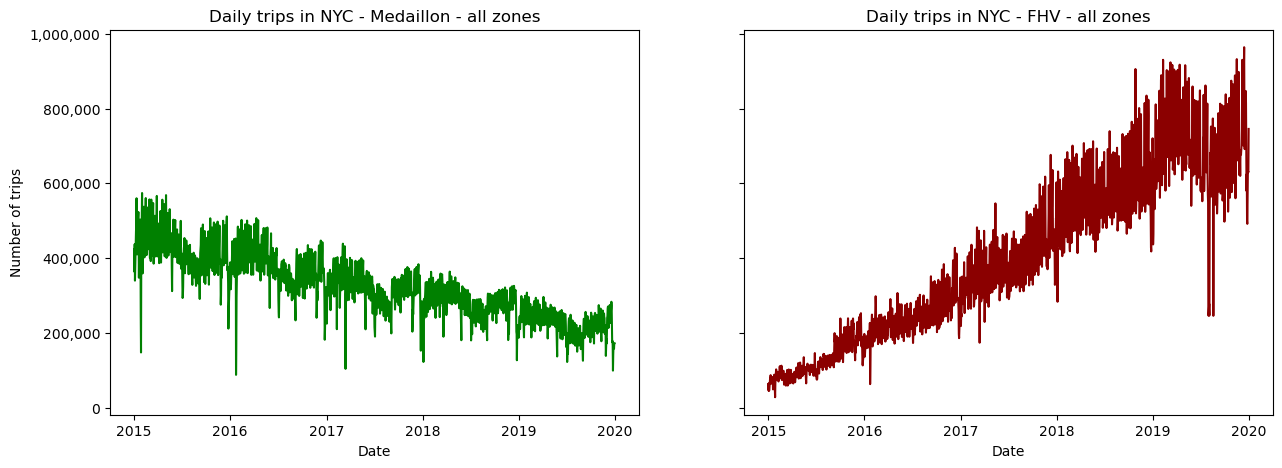

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)


# plot daily trips against date
axs[0].plot(medaillon_date["date_pickup"], medaillon_date['trip_number'], color = 'green' , label = 'Daily trip sum')
axs[1].plot(fhv_date["date_pickup"], fhv_date['trip_number'], color = 'darkred' , label = 'Daily trip sum')
axs[0].set_xlabel('Date')
axs[1].set_xlabel('Date')
axs[0].set_ylabel('Number of trips')
def y_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Apply the formatter to each subplot
for ax in axs:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_formatter))
plt.show()